In [42]:
import random 
import numpy as np

In [43]:
def random_spin_field(N,M):
    return np.random.choice([-1,1], size=(N,M))
random_spin_field(10,10)
    

array([[ 1, -1, -1, -1, -1,  1,  1,  1,  1, -1],
       [ 1,  1, -1, -1, -1, -1,  1,  1, -1,  1],
       [-1,  1, -1, -1, -1,  1,  1,  1,  1, -1],
       [ 1, -1,  1,  1, -1, -1,  1, -1,  1, -1],
       [ 1,  1, -1,  1,  1,  1,  1, -1, -1,  1],
       [-1, -1, -1, -1, -1,  1,  1,  1, -1, -1],
       [ 1, -1,  1, -1, -1, -1, -1,  1, -1, -1],
       [ 1, -1, -1,  1,  1, -1,  1,  1, -1, -1],
       [ 1,  1,  1,  1,  1, -1, -1, -1,  1,  1],
       [-1, -1,  1,  1, -1, -1, -1,  1,  1,  1]])

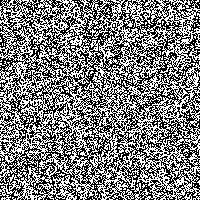

In [44]:
from PIL import Image
def display_spin_field(field): 
    return Image.fromarray(np.uint8((field + 1) * 0.5 * 255))
display_spin_field(random_spin_field(200,200))   

In [45]:
def _ising_step(field,beta=0.4):
    N,M = field.shape
    for n_ofset in range(2):
        for m_ofset in range(2):
            for n in range(n_ofset,N,2):
                for m in range(m_ofset,M,2):
                    _ising_update(field,n,m,beta)
    return field
def _ising_update(field,n,m,beta):
    total=0
    N,M=field.shape
    for i in range(n-1 , n+2):
        for j in range(m-1 , m+2):
            if i==n and j==m:
                continue
            total+= field[i%N,j%M] 
    dE=2*field[n,m]*total
    if dE<=0:
        field[n,m] *=-1
    elif np.exp(-dE*beta) > np.random.rand():
        field[n,m]*=-1
    

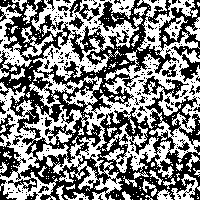

In [46]:
display_spin_field(_ising_step(random_spin_field(200,200)))


In [51]:
from ipywidgets import interact

def display_ising_sequence(images):
    def _show(frame = (0, len(images) - 1)):
        display_spin_field(images[frame])
    return interact(_show)   

In [ ]:
images = [random_spin_field(200,200)]
for i in range(50):
    images.append(_ising_step(images[-1].copy()))
display_ising_sequence(images)